# Project - Data Science Salaries

![Data Science Workflow](img/ds-workflow.png)

## Project Objective
- The aim of this project is to showcase compelling statistics on Data Science Salaries.
- Local newspapers or online platforms are interested in featuring an article that highlights the financial rewards associated with pursuing a career in Data Science.

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Read the data
- Dataset is from **Kaggle** (Get updated dataset [here](https://www.kaggle.com/saurabhshahane/data-science-jobs-salaries))

In [3]:
data = pd.read_csv('files/data_science_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


### Step 1.c: Inspect the data

In [4]:
len(data)

245

The size of a dataset can provide insights into several aspects of the data, such as:
- Statistical Significance
- Generalizability
- Quality of Analysis
- Computational Requirements
- Potential for Overfitting/Underfitting

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types

In [5]:
data.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Step 2.b: Check for null (missing) values

In [6]:
data.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

### Step 2.c: Understand features
- Example:
    - `experience_level`: 
        - EN: Entry-level / Junior
        - MI: Mid-level / Intermediate
        - SE: Senior-level / Expert
        - EX: Executive-level / Director
- See full description on [Kaggle](https://www.kaggle.com/saurabhshahane/data-science-jobs-salaries)

In [7]:
data['work_year'].unique()

array(['2021e', '2020'], dtype=object)

In [10]:
data['experience_level'].unique()

array(['EN', 'SE', 'EX', 'MI'], dtype=object)

In [11]:
data['company_size'].unique()

array(['L', 'M', 'S'], dtype=object)

### Step 2.d: Salaries
- Notice that salaries are given in different currencies
- Also, notice `salary_in_usd`

In [12]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Explore features

In [13]:
data.groupby('experience_level')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,54.0,59753.462963,49103.427811,4000.0,21732.25,58800.5,82500.0,250000.0
EX,11.0,226288.000000,164029.405584,70329.0,114021.50,154963.0,280000.0,600000.0
MI,103.0,85738.135922,78324.468318,2876.0,40505.00,73000.0,110000.0,450000.0
SE,77.0,128841.298701,67909.763752,19052.0,78340.00,120000.0,170000.0,412000.0


In [14]:
data.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,132.0,114374.015152,90822.326575,5898.0,56183.5,91500.0,150000.0,600000.0
M,55.0,85082.818182,72504.464408,4000.0,36337.5,71968.0,116062.5,450000.0
S,58.0,80874.793103,72038.848392,2876.0,35555.5,68364.5,101951.0,416000.0


### Step 3.b: Explore data on two columns

In [15]:
data.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean()

experience_level  company_size
EN                L                75148.000000
                  M                41063.923077
                  S                57502.000000
EX                L               239729.875000
                  M                85000.000000
                  S               243164.500000
MI                L                96285.451613
                  M                83982.800000
                  S                47610.000000
SE                L               134465.604651
                  M               122572.125000
                  S               120978.055556
Name: salary_in_usd, dtype: float64

### Step 3.c: Describe data on two columns

In [16]:
data.groupby(['company_size', 'experience_level'])['salary_in_usd'].describe()

count           mean            std      min  \
company_size experience_level                                                 
L            EN                 19.0   75148.000000   64087.707409   5898.0   
             EX                  8.0  239729.875000  163591.318040  79833.0   
             MI                 62.0   96285.451613   80426.650346   6072.0   
             SE                 43.0  134465.604651   74345.888870  21843.0   
M            EN                 13.0   41063.923077   30822.672549   4000.0   
             EX                  1.0   85000.000000            NaN  85000.0   
             MI                 25.0   83982.800000   87827.739265   4000.0   
             SE                 16.0  122572.125000   51404.202382  19052.0   
S            EN                 22.0   57502.000000   39823.933768   6072.0   
             EX                  2.0  243164.500000  244426.308160  70329.0   
             MI                 16.0   47610.000000   32458.213574   2876.0   
             SE                 18.0  120978.055556   66689.351887  33511.0   

                                     25%       50%        75%       max  
company_size experience_level                                            
L            EN                 33730.50   64369.0   87000.00  250000.0  
             EX                148260.75  192481.5  257500.00  600000.0  
             MI                 46851.50   82500.0  112654.00  450000.0  
             SE                 74147.00  135000.0  174000.00  412000.0  
M            EN                 21695.00   28475.0   65561.00  100000.0  
             EX                 85000.00   85000.0   85000.00   85000.0  
             MI                 38776.00   61985.0  111775.00  450000.0  
             SE                 94552.00  117062.5  166250.00  195000.0  
S            EN                 18993.75   55660.5   88750.00  138000.0  
             EX                156746.75  243164.5  329582.25  416000.0  
             MI                 17737.25   46720.5   68300.00  110000.0  
             SE                 78110.75  108898.5  160000.00  260000.0

### Step 3.d: Visualize the description

<Axes: title={'center': 'salary_in_usd'}, xlabel='company_size'>

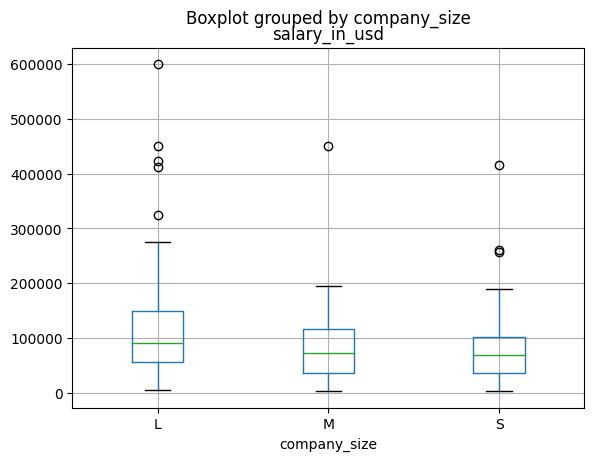

In [17]:
data.boxplot(column='salary_in_usd', by='company_size')

For large companies, the median salary is around 100,000 USD. For small companies, the median salary is around 80,000 USD.
Aditionally, the median salary for large companies is higher than the median salary for small companies. Large companies also have outliers in the high salary range when compared to medium and small companies. 

<Axes: title={'center': 'salary_in_usd'}, xlabel='experience_level'>

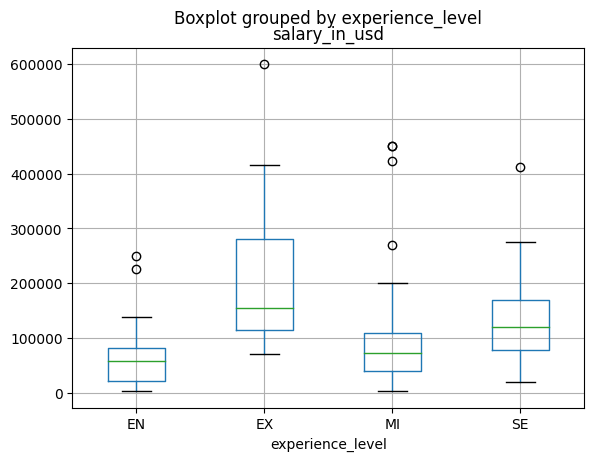

In [18]:
data.boxplot(column='salary_in_usd', by='experience_level')

From the box plot above, we can see that the median salary for data scientists with 1-2 years of experience is higher than the median salary for data scientists with 3-5 years of experience. However, the median salary for data scientists with 6-10 years of experience is lower than the median salary for data scientists with 3-5 years of experience.


## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Presenting findings

In [20]:
plot_data = data.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().unstack()
plot_data

experience_level,EN,EX,MI,SE
company_size,,,,
L,75148.000000,239729.875,96285.451613,134465.604651
M,41063.923077,85000.000,83982.800000,122572.125000
S,57502.000000,243164.500,47610.000000,120978.055556


### Step 4.b: Re-order index and columns

In [22]:
plot_data = plot_data.reindex(index=['S', 'M', 'L'], columns=['EN', 'MI', 'SE', 'EX'])
plot_data

experience_level,EN,MI,SE,EX
company_size,,,,
S,57502.000000,47610.000000,120978.055556,243164.500
M,41063.923077,83982.800000,122572.125000,85000.000
L,75148.000000,96285.451613,134465.604651,239729.875


### Step 4.c: Visualize results

<Axes: xlabel='company_size'>

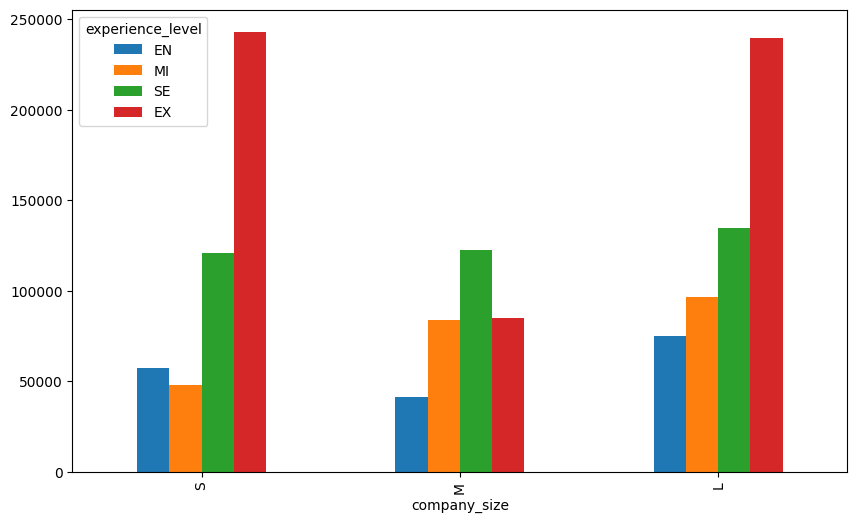

In [23]:
plot_data.plot.bar(label='Salary in USD', figsize=(10, 6))

## Step 5: Actions

### Step 5.a:

- The salary of a data scientist depends on company size and experience level.
- More experienced data scientists tend to have higher salaries.
- Bigger companies tend to pay higher salaries to data scientists than smaller companies.
- Data scientists at small companies generally have lower salaries than those at medium or large companies.
- Data scientists at medium-sized companies generally have lower salaries than those at large companies.
- Data scientists with more experience generally have higher salaries than those with less experience.
- Data scientists with medium-level experience generally have higher salaries than those with little experience.
- Executives at small companies appear to earn similar salaries to those at large companies, possibly because they are the company founders and have control over employee salaries.
